In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [159]:
train = pd.read_csv('DailyDelhiClimateTrain.csv')
test = pd.read_csv('DailyDelhiClimateTest.csv')

train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [161]:
train = train.set_index('date')
test = test.set_index('date')

train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [162]:
train.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

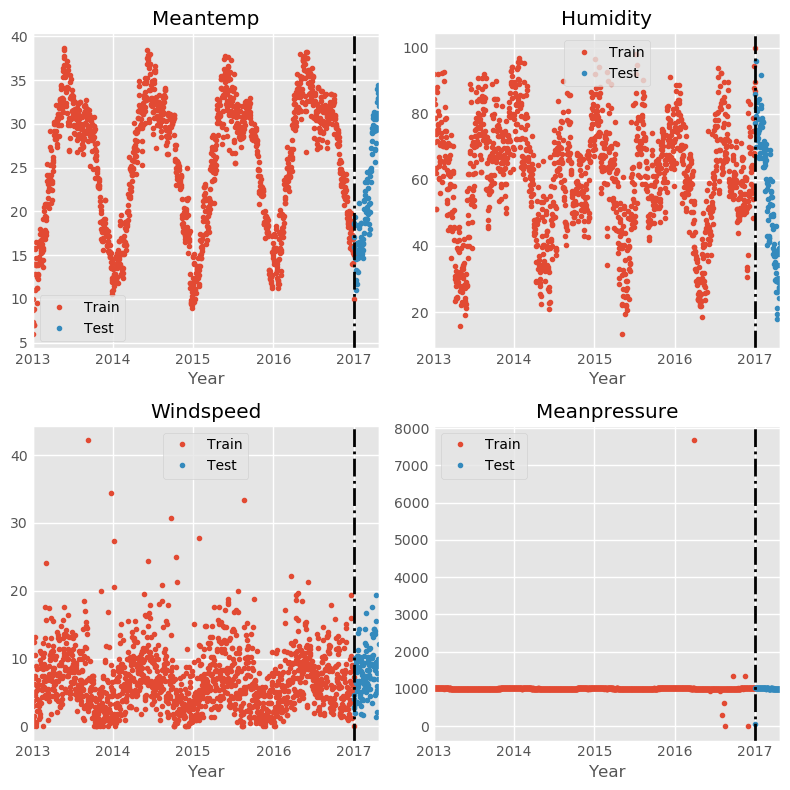

In [163]:
plt.figure(figsize=(8,8))

i = 1

for c in train.columns:
    
    plt.subplot(2, 2, i)
    
    train[c].plot(style = '.')
    test[c].plot(style = '.')

    plt.axvline('2017-01-01', color = 'black', ls = '-.')
    plt.legend(['Train', 'Test'], loc = 'best')
    plt.title(c.capitalize().replace('_', ''))
    plt.xlabel('Year')
    
    i += 1

plt.tight_layout()
plt.show()

In [164]:
def create_features(df):

    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

train = create_features(train)

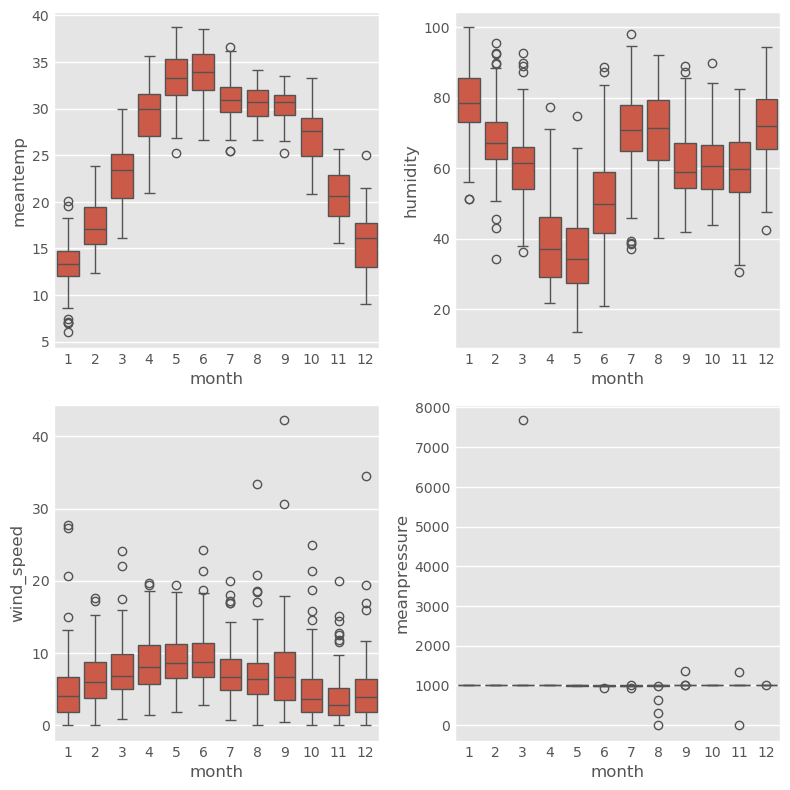

In [174]:
plt.figure(figsize=(8,8))

i = 1

for c in train.columns[0:4]:
    
    plt.subplot(2, 2, i)
    
    sns.boxplot(data=train, x='month', y=c)
    
    i += 1

plt.tight_layout()
plt.show()
